# Load Dataset

In [72]:
import pandas as pd

In [73]:
data = pd.read_csv("data/dataSet.csv")

In [74]:
data.shape

(9000, 2)

In [75]:
data.head()

,Comment,Label
0,"মুভির ট্রেলার দেখে ভালোই লেগেছে, তবে কিছু কিছু...",2.0
1,"কিছু দৃশ্য খুব ভালো ছিল, কিন্তু চরিত্রগুলোর মধ...",2.0
2,"অভিনয় মোটামুটি ভালো, তবে প্রডাকশন ভীষণ ভালো হত...",2.0
3,"গল্পটা ঠিকঠাক, তবে কিছু জায়গায় লম্বা মনে হয়েছে।",2.0
4,"সুরের সাথে সাথে দৃশ্যগুলোও ভালো লেগেছে, তবে কি...",2.0


# Preparing & Splitting Data

In [76]:
data.isnull().sum()

Comment    0
Label      0
dtype: int64

In [77]:
data['Label'] = data['Label'].replace({0.0 : 'Negative', 1.0 : 'Positive', 2.0 : 'Neutral'})

In [78]:
data.head()

,Comment,Label
0,"মুভির ট্রেলার দেখে ভালোই লেগেছে, তবে কিছু কিছু...",Neutral
1,"কিছু দৃশ্য খুব ভালো ছিল, কিন্তু চরিত্রগুলোর মধ...",Neutral
2,"অভিনয় মোটামুটি ভালো, তবে প্রডাকশন ভীষণ ভালো হত...",Neutral
3,"গল্পটা ঠিকঠাক, তবে কিছু জায়গায় লম্বা মনে হয়েছে।",Neutral
4,"সুরের সাথে সাথে দৃশ্যগুলোও ভালো লেগেছে, তবে কি...",Neutral


In [79]:
X = data["Comment"]
y = data["Label"]

In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_en = le.fit_transform(y)

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_en, test_size=0.2, random_state=42)

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
vct = CountVectorizer()
X_train_vct = vct.fit_transform(X_train)
X_test_vct = vct.transform(X_test)

# Build Model

In [83]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(verbose=0)
model.fit(X_train_vct,y_train)
print(f'Accuracy : {model.score(X_train_vct,y_train):.3f}')

Accuracy : 0.762


In [84]:
model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=15, loss_function='MultiClass', random_state=42)
model.fit(X_train_vct,y_train)
print(f'Accuracy : {model.score(X_train_vct,y_train):.3f}')

0:	learn: 1.0581890	total: 91.1ms	remaining: 45.5s
1:	learn: 1.0262599	total: 911ms	remaining: 3m 46s
2:	learn: 0.9990078	total: 1.87s	remaining: 5m 10s
3:	learn: 0.9749531	total: 2.74s	remaining: 5m 40s
4:	learn: 0.9536760	total: 3.67s	remaining: 6m 3s
5:	learn: 0.9390965	total: 3.93s	remaining: 5m 23s
6:	learn: 0.9235005	total: 4.04s	remaining: 4m 44s
7:	learn: 0.9107368	total: 4.94s	remaining: 5m 3s
8:	learn: 0.9006893	total: 5.03s	remaining: 4m 34s
9:	learn: 0.8884034	total: 5.91s	remaining: 4m 49s
10:	learn: 0.8765567	total: 6.78s	remaining: 5m 1s
11:	learn: 0.8682733	total: 7.61s	remaining: 5m 9s
12:	learn: 0.8587903	total: 8.52s	remaining: 5m 19s
13:	learn: 0.8515330	total: 9.37s	remaining: 5m 25s
14:	learn: 0.8441441	total: 10.2s	remaining: 5m 30s
15:	learn: 0.8381042	total: 10.7s	remaining: 5m 22s
16:	learn: 0.8311866	total: 11.5s	remaining: 5m 27s
17:	learn: 0.8250087	total: 12.4s	remaining: 5m 31s
18:	learn: 0.8211265	total: 12.5s	remaining: 5m 16s
19:	learn: 0.8170442	total

In [85]:
model = CatBoostClassifier(iterations=5000, learning_rate=0.1, depth=15, loss_function='MultiClass', random_state=42)
model.fit(X_train_vct,y_train)
print(f'Accuracy : {model.score(X_train_vct,y_train):.3f}')

0:	learn: 1.0581890	total: 45.5ms	remaining: 3m 47s
1:	learn: 1.0262599	total: 849ms	remaining: 35m 22s
2:	learn: 0.9990078	total: 1.64s	remaining: 45m 25s
3:	learn: 0.9749531	total: 2.49s	remaining: 51m 51s
4:	learn: 0.9536760	total: 3.44s	remaining: 57m 13s
5:	learn: 0.9390965	total: 3.68s	remaining: 51m 3s
6:	learn: 0.9235005	total: 3.77s	remaining: 44m 47s
7:	learn: 0.9107368	total: 4.57s	remaining: 47m 30s
8:	learn: 0.9006893	total: 4.62s	remaining: 42m 39s
9:	learn: 0.8884034	total: 5.36s	remaining: 44m 34s
10:	learn: 0.8765567	total: 6.24s	remaining: 47m 8s
11:	learn: 0.8682733	total: 7.04s	remaining: 48m 44s
12:	learn: 0.8587903	total: 7.97s	remaining: 50m 56s
13:	learn: 0.8515330	total: 8.76s	remaining: 52m
14:	learn: 0.8441441	total: 9.63s	remaining: 53m 20s
15:	learn: 0.8381042	total: 10.1s	remaining: 52m 20s
16:	learn: 0.8311866	total: 10.9s	remaining: 53m 8s
17:	learn: 0.8250087	total: 11.8s	remaining: 54m 17s
18:	learn: 0.8211265	total: 11.9s	remaining: 51m 59s
19:	learn:

# Hyperparameter Tuning

In [86]:
model = CatBoostClassifier(verbose=0)

In [87]:
param_grid = [
    {
        'iterations': [500, 1000, 2000],
        'learning_rate': [0.01,0.03, 0.1],
        'depth': [4,6,8,10],
        # 'loss_function': 'MultiClass',
        # 'random_state': 42,
        'l2_leaf_reg':[1,3,5,10]
    }
]

# CatBoost Classifier - GridSearchCV

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
clf = GridSearchCV(model, param_grid=param_grid)

In [90]:
# clf = GridSearchCV(model, param_grid=param_grid, cv=3, verbose=True, n_jobs=-1)

In [91]:
best_clf = clf.fit(X_train_vct,y_train)

In [92]:
best_clf.best_estimator_

In [93]:
print(f'Accuracy : {best_clf.score(X_train_vct,y_train):.3f}')

Accuracy : 0.855


# CatBoost Classifier - RandomizedSearchCV

In [94]:
from sklearn.model_selection import RandomizedSearchCV

In [95]:
clf = RandomizedSearchCV(model, param_grid)

In [96]:
best_clf = clf.fit(X_train_vct,y_train)

In [97]:
best_clf.best_estimator_

In [98]:
print(f'Accuracy : {best_clf.score(X_train_vct,y_train):.3f}')

Accuracy : 0.764


# Best Result 

In [99]:
model = CatBoostClassifier(iterations=5000, learning_rate=0.1, depth=16, loss_function='MultiClass', random_state=42)
model.fit(X_train_vct,y_train)
print(f'Accuracy : {model.score(X_train_vct,y_train):.3f}')

0:	learn: 1.0581890	total: 53.1ms	remaining: 4m 25s
1:	learn: 1.0235032	total: 1.64s	remaining: 1h 8m 23s
2:	learn: 0.9945129	total: 3.27s	remaining: 1h 30m 52s
3:	learn: 0.9701740	total: 3.35s	remaining: 1h 9m 41s
4:	learn: 0.9496947	total: 4.98s	remaining: 1h 22m 56s
5:	learn: 0.9377854	total: 5.02s	remaining: 1h 9m 35s
6:	learn: 0.9241996	total: 5.23s	remaining: 1h 2m 9s
7:	learn: 0.9104709	total: 6.75s	remaining: 1h 10m 13s
8:	learn: 0.8971533	total: 8.42s	remaining: 1h 17m 49s
9:	learn: 0.8857717	total: 10.1s	remaining: 1h 23m 40s
10:	learn: 0.8762944	total: 10.9s	remaining: 1h 22m 42s
11:	learn: 0.8672007	total: 12.6s	remaining: 1h 27m 35s
12:	learn: 0.8571720	total: 14.2s	remaining: 1h 31m 4s
13:	learn: 0.8489889	total: 15s	remaining: 1h 28m 53s
14:	learn: 0.8405889	total: 16.5s	remaining: 1h 31m 32s
15:	learn: 0.8349415	total: 18.2s	remaining: 1h 34m 38s
16:	learn: 0.8290707	total: 18.4s	remaining: 1h 30m 3s
17:	learn: 0.8224197	total: 20.1s	remaining: 1h 32m 53s
18:	learn: 0.8

In [100]:
prediction = model.predict(X_test_vct)

In [101]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.64      0.62      0.63       613
           1       0.67      0.67      0.67       614
           2       0.71      0.73      0.72       573

    accuracy                           0.67      1800
   macro avg       0.67      0.68      0.68      1800
weighted avg       0.67      0.67      0.67      1800



In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

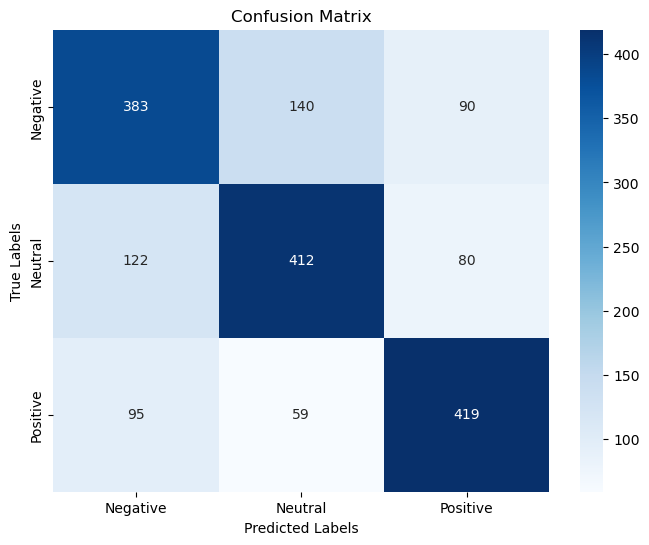

In [103]:
conf_matrix = confusion_matrix(y_test, prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()